In [1]:
import numpy as np


In [2]:
x=np.load("Without_jacket.npy")
    
x2=np.load('With_jacket.npy')

In [3]:
#new without__jacket
new_wo_j=[[None]*160000]*27
new_w_j=[[None]*160000]*27

def convert(source,dest,label):
    #tmp placeholder
    co= [[None]*400]*200
    cross= [[None]*400]*200

    for i in range(len(source)):
        x_1=source[i][:200000]
        x_2=source[i][200000:400000]
        x_1=x_1.reshape(200,1000)
        x_2=x_2.reshape(200,1000)

    #     converts (200,1000-)->(200,1024)
        for j in range(200):
            fft_result_co=np.abs(np.fft.fft(x_1[j],1024))
            fft_result_cross=np.abs(np.fft.fft(x_2[j],1024))
            first200 = fft_result_co[:200]
            last200=fft_result_co[824:]
            co[j]=np.concatenate([first200,last200])
            first200 = fft_result_cross[:200]
            last200=fft_result_cross[824:]
            cross[j]=np.concatenate([first200,last200])

    #     at this point tmp placeholders have trimmed fft data
    #     print np.array(co).shape
    #     print np.array(cross).shape
       
    
        co=np.array(co).reshape(80000,)
        cross=np.array(cross).reshape(80000,)
        dest[i]=list(co)+list(cross)+[label]
    #     print co.shape
    #     print cross.shape
        co= [[None]*400]*200
        cross= [[None]*400]*200
    
convert(x,new_wo_j,0)
convert(x2,new_w_j,1)



    
        
        
        

In [4]:
print np.array(new_wo_j).shape
print np.array(new_w_j).shape

(27, 160001)
(27, 160001)


In [19]:
x = new_wo_j+new_w_j
print np.array(x).shape
shuffle(x)
print np.array(x)[:,-1]
print np.array(x).shape
np.save('alldata_new.npy',np.array(x))

(54, 160001)
[ 0.  0.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  0.  1.  1.  1.
  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.
  1.  1.  0.  0.  1.  0.  1.  1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.]
(54, 160001)


In [85]:
#concatenating with jacket and without jacket. shuffling

In [16]:
# print np.array(new_wo_j+new_w_j).shape
from random import shuffle
# # alldata=new_wo_j+new_w_j
# # shuffle(alldata)
# print np.array(new_wo_j+new_w_j).shape
# print new_wo_j+new_w_j[:1]
# x = np.load('alldata.npy')
# print x[5]

In [6]:
np.save('alldata.npy',np.array(new_wo_j+new_w_j))

In [86]:
#saving as CSV file

In [87]:
import pandas as pd
df= pd.DataFrame(alldata)
df.to_csv('alldata_new.csv')

In [89]:
#training script


In [ ]:
###########################
#loading libs

from keras import optimizers
from keras.models import Sequential
from keras.layers import TimeDistributed,Dense, Dropout, Activation,LSTM,Bidirectional,GaussianNoise
from keras.optimizers import SGD
import numpy as np
from keras.utils import to_categorical
from keras.preprocessing import sequence
#uncomment these if you get tensorflow warnings
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
from keras.callbacks import TensorBoard
from time import time
import scipy.io as sio
from keras.regularizers import l2
from keras import regularizers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [ ]:
x1=np.load('home/hammad/data/alldata.npy')
train = x1[:,:160000]
trainy = x1[:,-1]

print trainy[:10]

test = train[-16:,:]
testy = trainy[-16:,:]

train=train[:-16]
trainy=trainy[:-16]

trainy = to_categorical(trainy, num_classes = 2)
testy = to_categorical(testy, num_classes = 2)
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

train = np.array(train)
test = np.array(test)
print 'train',train.shape
print 'trainy',trainy.shape
print 'test',test.shape
print 'testy',testy.shape


print 'train'
for i in range(10):
	print train[i]
print 'test'
for i in range(10):
	print test[i]


In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=600000))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(2, activation='softmax'))
#model.add(Dense(2,W_regularizer=l2(0.01)))

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# model.compile(loss='hinge',
#               optimizer='adadelta',
#               metrics=['accuracy'])


hist=model.fit(train,trainy,verbose = 1,validation_split=0.3,epochs=50,callbacks=[tensorboard])

score = model.evaluate(test, testy)
model.save("vestdetect_model")
print score

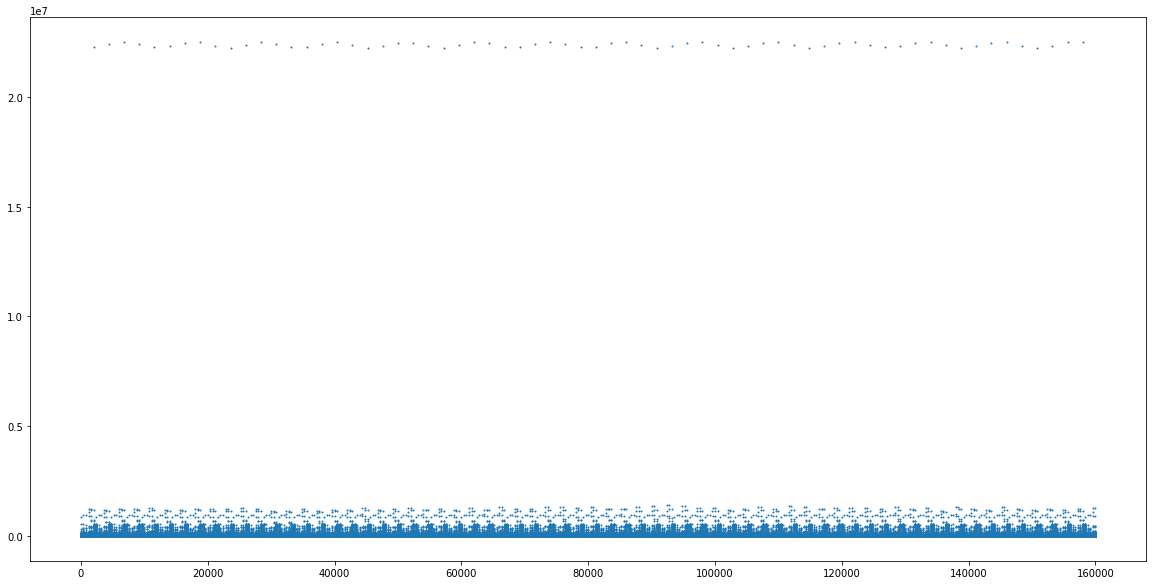

In [74]:
plt.scatter([i for i in range(160000)],new_w_j[0],s=1)
plt.show()

In [4]:
print x.shape

(27, 600001)


In [8]:
x_1=x[0][:200000]
x_2=x[0][200000:400000]

x_1=x_1.reshape(200,1000)
x_2=x_2.reshape(200,1000)
print x_1.shape
print x_2.shape



(200, 1000)
(200, 1000)


In [20]:
plt.scatter([i for i in range(1024)],np.abs(np.fft.fft(x_1[0],1024)),s=10)
plt.show()

NameError: name 'plt' is not defined

In [9]:
import matplotlib.pyplot as plt
import scipy.fftpack

In [69]:
y= [[None]*1024]*27
y2=[[None]*1024]*27
print np.array(y).shape
print np.array(y2).shape

(27, 1024)
(27, 1024)


In [172]:
for i in range(27):
    y[i]= np.abs(np.fft.fft(x[i],1024))
    y2[i]= np.abs(np.fft.fft(x2[i],1024))
print y[i].shape
print y2[i].shape

(1024,)
(1024,)


In [10]:
fig_size = plt.rcParams["figure.figsize"]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
print "New size:", fig_size

Current size: [6.0, 4.0]
New size: [20, 10]


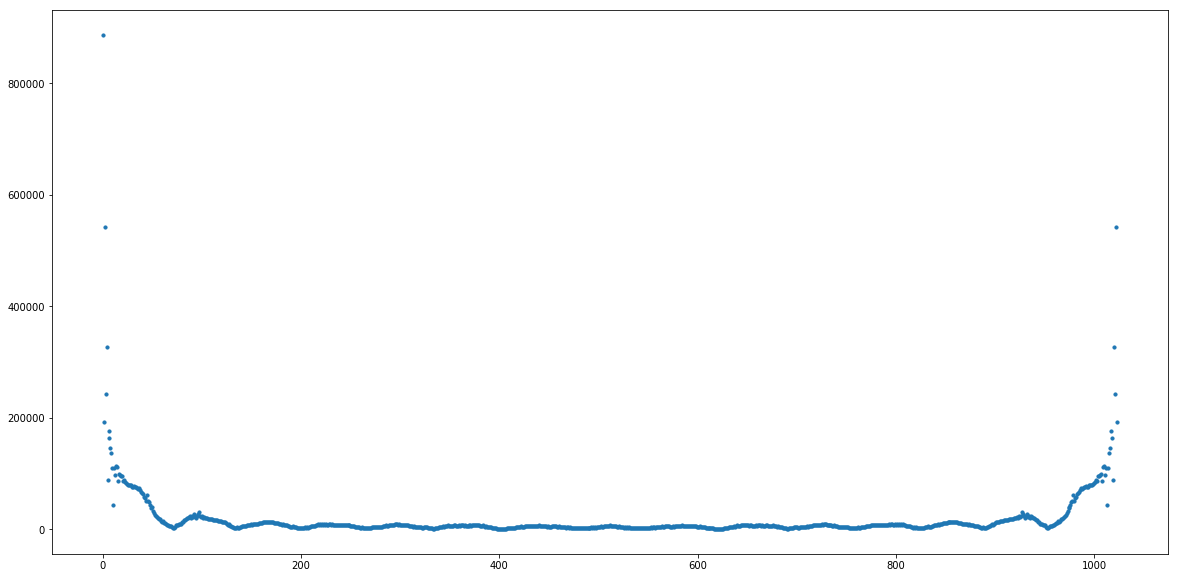

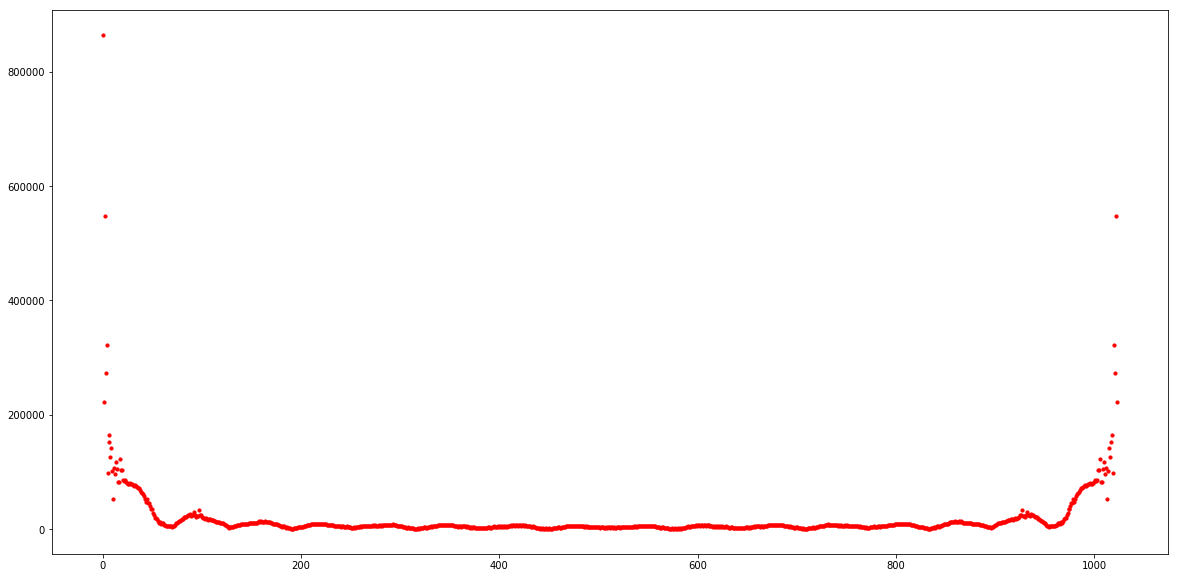

In [173]:
plt.scatter([i for i in range(1024)],y[0],s=10)
plt.show()
plt.scatter([i for i in range(1024)],y2[0],s=10,c='red')
plt.show()


In [ ]:
#creating placeholders

In [174]:
new_without_jacket_data=[[None]*400]*27
print 'without',np.array(new_without_jacket_data).shape
new_with_jacket_data=[[None]*401]*27
print 'with',np.array(new_with_jacket_data).shape

without (27, 400)
with (27, 401)


In [ ]:
#trimming

In [175]:
temp = np.array(y)[:,:200]
last200=np.array(y)[:,824:]
for i in range(27):
    #print i.shape
    new_without_jacket_data[i]=np.concatenate([temp[i],last200[i],[0]])
#print new_without_jacket_data[0]    
new_without_jacket_data= np.array(new_without_jacket_data)
print new_without_jacket_data.shape




(27, 401)


In [176]:
temp = np.array(y2)[:,:200]
last200=np.array(y2)[:,824:]
for i in range(27):
    #print i.shape
    new_with_jacket_data[i]=np.concatenate([temp[i],last200[i],[1]])
    
new_with_jacket_data= np.array(new_with_jacket_data)
print new_with_jacket_data.shape


(27, 401)


In [155]:
#concatinating and shuffling
type(new_without_jacket_data)

numpy.ndarray

In [177]:
alldata=np.concatenate([new_with_jacket_data,new_without_jacket_data])
print alldata.shape
np.random.shuffle(alldata)
print alldata[0]

(54, 401)
[  6.48768000e+05   2.28266962e+05   3.84849076e+05   2.97759241e+05
   9.02636361e+04   1.29419485e+05   5.80408221e+04   6.69589239e+04
   5.89209517e+04   9.53043322e+04   6.35838538e+04   7.16916136e+04
   8.26944019e+04   6.54064006e+04   8.11005707e+04   6.42103253e+04
   6.17217706e+04   6.66154294e+04   5.90668092e+04   6.49683093e+04
   5.41364644e+04   6.18005466e+04   5.45300924e+04   6.13024206e+04
   5.23936272e+04   5.47849773e+04   5.23631596e+04   5.13455922e+04
   5.18877380e+04   5.01532849e+04   5.25421904e+04   4.94755736e+04
   5.21919532e+04   4.96680880e+04   4.89181092e+04   4.62082282e+04
   4.75570989e+04   4.61458935e+04   4.53149020e+04   4.48791473e+04
   4.31421968e+04   4.20666966e+04   4.00379042e+04   3.92832876e+04
   3.64587031e+04   3.64417683e+04   3.50372492e+04   3.26900961e+04
   2.95011230e+04   2.84823850e+04   2.81509464e+04   2.66550929e+04
   2.32856691e+04   2.12637234e+04   1.86806961e+04   1.83145850e+04
   1.78306970e+04   1.71

In [165]:
array =np.asarray(alldata)
np.savetxt('alldata.csv',array,delimiter=',')

In [178]:
import pandas as pd 
df = pd.DataFrame(alldata)
df.to_csv("alldata.csv")

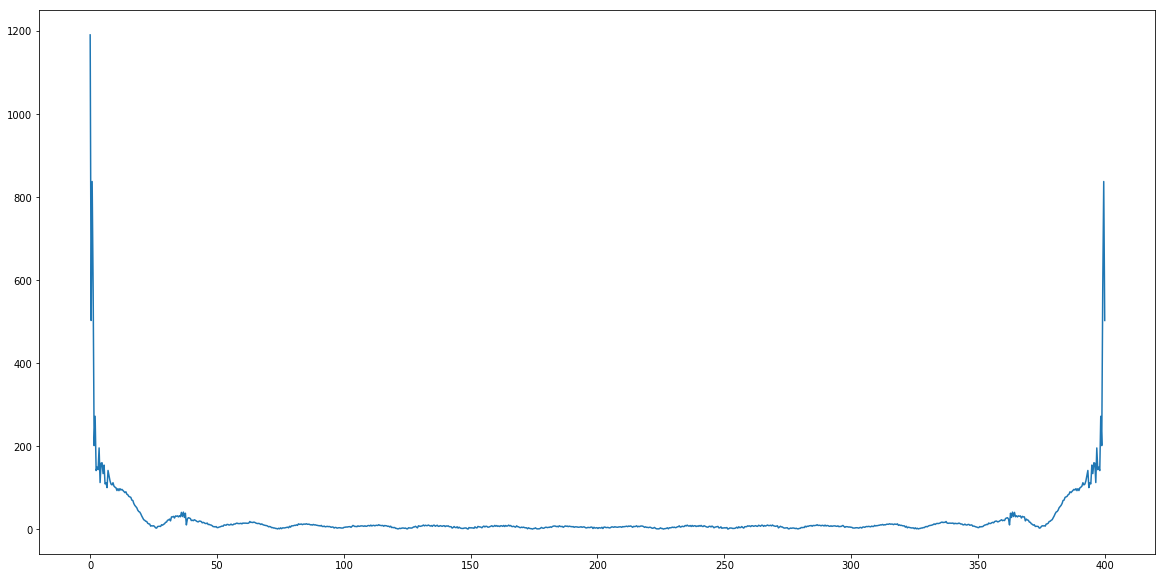

In [163]:

N = 1024

# sample spacing
T = 1.0 / 800.0


xf = np.linspace(0.0, 1.0/(2.0*T), N)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(y[9][:N]))
plt.show()

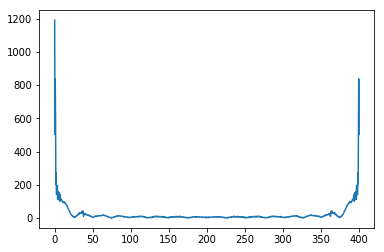

In [98]:
N = 1024

# sample spacing
T = 1.0 / 800.0


xf = np.linspace(0.0, 1.0/(2.0*T), N)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(y[9][:N]))
# plt.figure(figsize=(40,10))
plt.show()

In [56]:
plt.plot(y[0], sp.real,y[0], sp.imag)


In [83]:
plt.show()